Beata Sirowy

# Bayesian statistics in Python: basics

Based on: Downey, A. (2021) _Think Bayes_

The required Python packages include pandas,  scipy,  matplotlib, and  empiricaldist.

In [ ]:
pip install pandas scipy matplotlib empiricaldist

The foundation of Bayesian statistics is Bayes’s theorem, and the foundation of
Bayes’s theorem is conditional probability.

## Conditional probability

To introduce conditional probability, we’ll use an example from a famous
experiment by Tversky and Kahneman, who posed the following question:

_Linda is 31 years old, single, outspoken, and very bright. She majored in
philosophy. As a student, she was deeply concerned with issues of
discrimination and social justice, and also participated in anti-nuclear
demonstrations. Which is more probable?_

_1. Linda is a bank teller._

_2. Linda is a bank teller and is active in the feminist movement._

Many people choose the second answer, presumably because it seems more
consistent with the description. 

But the second answer cannot be “more probable”, as the question asks. Suppose
we find 1,000 people who fit Linda’s description and 10 of them work as bank
tellers. How many of them are also feminists? At most, all 10 of them are; in that
case, the two options are equally probable. If fewer than 10 are, the second
option is less probable. __But there is no way the second option can be more
probable.__

If you were inclined to choose the second option, you are in good company. The
biologist Stephen J. Gould wrote:

_I am particularly fond of this example because I know that the [second]
statement is least probable, yet a little homunculus in my head continues to
jump up and down, shouting at me, “but she can’t just be a bank teller; read
the description.”_

### Probability

Our working definition: 
__A probability is a fraction of a
finite set.__

With this definition and an appropriate dataset, we can compute probabilities by
counting.

We first download the dataset. I’ll use data from the General Social Survey (GSS).

In [8]:
from os.path import basename, exists
from os import getcwd

def download(url):
    filename = basename(url)
    download_path = getcwd() + '/' + filename
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local + "to" + download_path)
    else: 
        print(filename + " has already been downloaded to " + download_path)
# The urlretrieve function returns a tuple containing the path to the local file and the headers. 
# Here, local is the path to the downloaded file, and _ (underscore) is used to ignore the headers.
    
download('https://github.com/AllenDowney/ThinkBayes2/raw/master/data/gss_bayes.csv')

gss_bayes.csv has already been downloaded to C:\Users\Beata\AppData\Local\Programs\Microsoft VS Code/gss_bayes.csv



We use pandas to read the data and store it in a DataFrame.

In [11]:
import pandas as pd

gss = pd.read_csv('gss_bayes.csv', index_col=0)
gss.head()


,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
5,1974,58.0,2,6.0,1.0,2670.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0


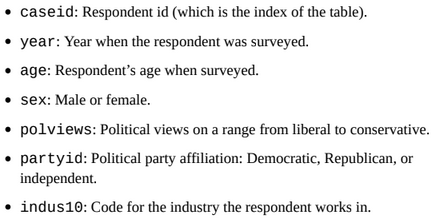

In [16]:
gss[:15]

,year,age,sex,polviews,partyid,indus10
caseid,,,,,,
1,1974,21.0,1,4.0,2.0,4970.0
2,1974,41.0,1,5.0,0.0,9160.0
5,1974,58.0,2,6.0,1.0,2670.0
6,1974,30.0,1,5.0,4.0,6870.0
7,1974,48.0,1,5.0,4.0,7860.0
8,1974,67.0,1,5.0,0.0,2870.0
10,1974,54.0,2,6.0,0.0,9470.0
11,1974,89.0,1,4.0,5.0,6990.0
12,1974,71.0,1,2.0,2.0,6080.0


#### Fraction of bankers

The code for “Banking and related activities” is 6870, so we can select bankers:

In [12]:
banker = (gss['indus10'] == 6870)
banker.head()

caseid
1    False
2    False
5    False
6     True
7    False
Name: indus10, dtype: bool

The result is a pandas Series that contains the Boolean values True and False. 

If we use the sum function on this Series, it treats True as 1 and False as
0, so the total is the number of bankers:

In [25]:
print(banker.sum())

728


To compute the fraction of bankers, we can use the mean function, which
computes the fraction of True values in the Series:

In [24]:
print(banker.mean())

0.014769730168391155


About 1.5% of the respondents work in banking, so if we choose a random
person from the dataset, the probability they are a banker is about 1.5%.

#### The Probability Function

In [84]:
def prob(A): #Computes the probability of a proposition, A.
    return A.mean()


In [37]:
prob(banker)

0.014769730168391155


Now let’s look at another variable in this dataset. The values of the column sex
are encoded like this:

1 Male
2 Female

We can make a Boolean Series that is True for female respondents and
False otherwise:

In [38]:
female = (gss['sex']==2)
female.head()

caseid
1    False
2    False
5     True
6    False
7    False
Name: sex, dtype: bool

In [40]:
female.sum()

np.int64(26511)

In [41]:
prob(female)

0.5378575776019476


The fraction of women in this dataset is higher than in the adult US population
because the GSS doesn’t include people living in institutions like prisons and
military housing, and those populations are more likely to be male.

#### Political views

The other variables we’ll consider are polviews, which describes the political
views of the respondents, and partyid, which describes their affiliation with a
political party.

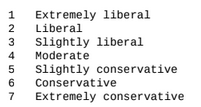

We’ll define liberal to be True for anyone whose response is “Extremely
liberal”, “Liberal”, or “Slightly liberal”:

In [42]:
liberal = gss["polviews"] <=3

prob(liberal)

0.27374721038750255


In [43]:
ext_liberal = gss["polviews"]==1
prob(ext_liberal)


0.02925542706431325


In [44]:
conservative = gss["polviews"]>=5
prob(conservative)

0.3419354838709677


In [47]:
ext_conservative = gss["polviews"]==7
prob(ext_conservative)


0.03235950497058227


The values of partyid are encoded like this:


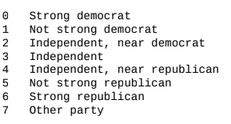

We’ll define democrat to include respondents who chose “Strong democrat” or
“Not strong democrat”:

In [50]:
democrat = gss['partyid'] <= 1
prob(democrat)

0.3662609048488537


In [55]:
republican = gss["partyid"].isin([5, 6])
prob(republican)

0.2610062893081761


### Conjunction

“Conjunction” is another name for the logical AND operation. If you have two
propositions, A and B, the conjunction A and B is True if both A and B are
True, and False otherwise.

If we have two Boolean Series, we can use the & operator to compute their
conjunction. For example, we have already computed the probability that a
respondent is a banker, and the probability that they are a Democrat.

Now we can compute the probability that a respondent is a banker and a
Democrat:


In [56]:
prob(banker & democrat)

0.004686548995739501


In [57]:
prob(banker & republican)

0.005132886995333739


In [58]:
prob(banker & ext_conservative)

0.00044633799959423816


In [59]:
prob(banker & ext_liberal)

0.00022316899979711908


In [60]:
prob(banker & female)

0.011381618989653074


In [87]:
# Probability of (banker & male)
a = prob(banker)
b = prob(banker & female)
c = a - b
print(c)


0.003388111178738081


### Conditional Probability

Conditional probability is a probability that depends on a condition:

- What is the probability that a respondent is a Democrat, given that they
are liberal?
- What is the probability that a respondent is female, given that they are a
banker?
- What is the probability that a respondent is liberal, given that they are
female?

Let’s start with the first one, which we can interpret like this: 

- “Of all the
respondents who are liberal, what fraction are Democrats?”

We can compute this probability in two steps:
- Select all respondents who are liberal.
- Compute the fraction of the selected respondents who are Democrats.

In [105]:
selected = democrat[liberal] # This selects the subset of the democrat population that are liberal. 
prob(selected)
# This approach gives you the respondents who are Democrats among those who are liberal.


np.float64(0.5206403320240125)

Alternative: liberal[democrat]  would imply you are selecting the subset of the liberal population that are democrat. This essentially checks for liberals within the Democrat population, which is not aligned with the conditional probability you need to calculate.

- “What is the probability that a respondent is
female, given that they are a banker?"

In [ ]:
selected1 = female[banker] # This selects the subset of the female population that are bankers
prob(selected1)

np.float64(0.7706043956043956)

An alternative formulation: banker[female]  would imply you are selecting the subset of the banker population that are female. This essentially checks for bankers within the female population, which is not aligned with the conditional probability you need to calculate.

- What is the probability that a respondent is liberal, given that they are
female?

In [109]:
selected2 = liberal[female] # This selects the subset of the liberal population that are female
prob(selected2)

np.float64(0.27581004111500884)

__Creating a function__

In [111]:
def conditional  (preposition, given):
    return prob(preposition[given])

conditional(ext_conservative, female)

np.float64(0.029006827354682962)

In [114]:
conditional(conservative, female)

np.float64(0.3171890913205839)

In [113]:
conditional(liberal, female)

np.float64(0.27581004111500884)

In [112]:
conditional(ext_liberal, female)

np.float64(0.02844102448040436)

### Conditional Probability Is Not Commutative

- We have seen that conjunction is commutative; that is, prob(A & B) is
always equal to prob(B & A).
- But conditional probability is not commutative; that is, conditional(A, B)
is not the same as conditional(B, A).

In [118]:
conditional(ext_liberal, female)

np.float64(0.02844102448040436)

In [117]:
conditional(female, ext_liberal)

np.float64(0.5228848821081831)

### Condition and Conjunction
We can combine conditional probability and conjunction. For example, here’s
the probability a respondent is female, given that they are a liberal Democrat:

In [124]:
A = liberal & democrat
conditional (female, A)

np.float64(0.576085409252669)

About 57% of liberal Democrats are female.

In [136]:
A = conservative & female
conditional (A, banker)

np.float64(0.2664835164835165)

About 27% of bankers are conservative women.

### Laws of Probability
Next, we’ll derive three relationships between conjunction
and conditional probability:

- Theorem 1: Using a conjunction to compute a conditional probability.
- Theorem 2: Using a conditional probability to compute a conjunction.
- Theorem 3: Using conditional(A, B) to compute conditional(B, A).

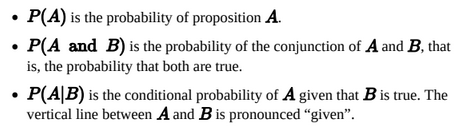

Theorem 3 is also known as Bayes’s theorem.

__Theorem 1__ gives us a way to compute a conditional probability using a
conjunction:

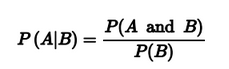

What fraction of bankers are female? 

In [137]:
female[banker].mean()

np.float64(0.7706043956043956)

In [140]:
conditional (female, banker)

np.float64(0.7706043956043956)

There is another way to compute this conditional probability, by computing
the ratio of two probabilities:
1. The fraction of respondents who are female bankers, and
2. The fraction of respondents who are bankers.

In [138]:
prob(female & banker) / prob(banker)

np.float64(0.7706043956043956)

__Theorem 2__

If we start with Theorem 1 and multiply both sides by P(B) we get Theorem 2:

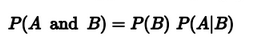

This formula suggests a second way to compute a conjunction: instead of using
the & operator, we can compute the product of two probabilities.

In [143]:
prob(democrat) * conditional (liberal, democrat)

np.float64(0.1425238385067965)

In [144]:
prob(liberal & democrat) 

np.float64(0.1425238385067965)

__Theorem 3: Bayes theorem__

- We have established that conjunction is commutative: P(A and B) = P(B and A)
- If we apply Theorem 2 to both sides:
P(B) P(A\B) = P(A) P(B\A)
- We divide both sides through P(B)

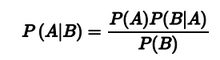

In [145]:
conditional(liberal, banker)

np.float64(0.2239010989010989)

In [147]:
(prob(liberal) * conditional(banker, liberal))/prob(banker)

np.float64(0.2239010989010989)

### The Law of Total Probability
In addition to these three theorems, there’s one more thing we’ll need to do
Bayesian statistics: the law of total probability. 

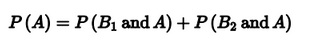

The total probability of is the sum of two possibilities: 
- either B1 and A are true or B2 and A are true. 
But this law applies only if B1 and B2 are:
- Mutually exclusive, which means that only one of them can be true, and
- Collectively exhaustive, which means that one of them must be true.

As an example, let’s use this law to compute the probability that a respondent is
a banker. 


In [148]:
prob(banker)

np.float64(0.014769730168391155)

In [149]:
prob(female & banker)

np.float64(0.011381618989653074)

In [150]:
prob(male & banker)

np.float64(0.003388111178738081)

In [151]:
prob(male & banker) + prob(female & banker)

np.float64(0.014769730168391155)

Applying Theorem 2, we can also write the law of total probability like this:

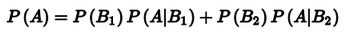

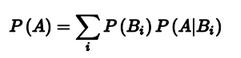

- this holds as long as the conditions B are mutually exclusive and
collectively exhaustive.

As an example, let’s consider polviews, which has
seven different values:

In [153]:
B = gss["polviews"]
B.value_counts()

polviews
4.0    18943
5.0     7940
6.0     7319
3.0     6243
2.0     5808
7.0     1595
1.0     1442
Name: count, dtype: int64

In [157]:
B.value_counts().sort_index()

polviews
1.0     1442
2.0     5808
3.0     6243
4.0    18943
5.0     7940
6.0     7319
7.0     1595
Name: count, dtype: int64

On this scale, 4.0 represents “Moderate”. So we can compute the probability of
a moderate banker like this:

In [159]:
i = 4
prob(B==i) * conditional(banker, B==i)

np.float64(0.005822682085615744)

In [162]:

prob(banker)

np.float64(0.014769730168391155)

In [ ]:
n =[]
for i in range (1, 8):
    x = prob(B==i) * conditional(banker, B==i)
    n.append(x)
sum(n)
    

[np.float64(0.0002231689997971191), np.float64(0.0014404544532359506), np.float64(0.0016433353621424225), np.float64(0.005822682085615744), np.float64(0.002860620815581254), np.float64(0.002333130452424427), np.float64(0.0004463379995942382)]


np.float64(0.014769730168391157)

Alternatively:

In [167]:
sum(prob(B==i) * conditional(banker, B==i) for i in range (1,8))

np.float64(0.014769730168391157)